# Data Science with Python Week 4

<h><center> Nguyen Van Duc </center></h>

# 1. Intro. to Jupyter Notebook

Pytago fomular:
$$x^2+y^2=z^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

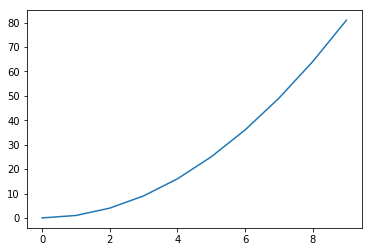

In [2]:
x=np.arange(10)
y=x**2
plt.plot(x,y)

In [3]:
%%timeit
x=range(10000)
a=max(x)

347 µs ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
import pandas as pd
filepath='data/Iris_Data.csv'
data = pd.read_csv(filepath)
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
data.petal_length.std()

1.7644204199522617

In [8]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
sample=(data.sample(n=5, replace=False, random_state=42))
print(sample.iloc[:,-3:])

     petal_length  petal_width          species
73            4.7          1.2  Iris-versicolor
18            1.7          0.3      Iris-setosa
118           6.9          2.3   Iris-virginica
78            4.5          1.5  Iris-versicolor
76            4.8          1.4  Iris-versicolor


## 2.Pandas

In [15]:
import pandas as pd
data = [23, 24, 57, 67, 90, 103]
data

[23, 24, 57, 67, 90, 103]

In [16]:
data=pd.Series(data, name='steps')
data

0     23
1     24
2     57
3     67
4     90
5    103
Name: steps, dtype: int64

In [21]:
data.index=pd.date_range('20180729', periods=6)
data

2018-07-29     23
2018-07-30     24
2018-07-31     57
2018-08-01     67
2018-08-02     90
2018-08-03    103
Freq: D, Name: steps, dtype: int64

In [22]:
data = data.astype(np.float)
data

2018-07-29     23.0
2018-07-30     24.0
2018-07-31     57.0
2018-08-01     67.0
2018-08-02     90.0
2018-08-03    103.0
Freq: D, Name: steps, dtype: float64

#### Missing data

In [24]:
data[1:3]=np.NaN
data

2018-07-29     23.0
2018-07-30      NaN
2018-07-31      NaN
2018-08-01     67.0
2018-08-02     90.0
2018-08-03    103.0
Freq: D, Name: steps, dtype: float64

In [27]:
data = data.fillna(0.)
data

2018-07-29     23.0
2018-07-30      0.0
2018-07-31      0.0
2018-08-01     67.0
2018-08-02     90.0
2018-08-03    103.0
Freq: D, Name: steps, dtype: float64

In [28]:
data1=[102,243,343,545,None,456,100,234,None]
data1

[102, 243, 343, 545, None, 456, 100, 234, None]

In [29]:
joined_data = list(zip(data, data1))
joined_data

[(23.0, 102), (0.0, 243), (0.0, 343), (67.0, 545), (90.0, None), (103.0, 456)]

In [30]:
act_data=pd.DataFrame(joined_data)
act_data


0      1
0   23.0  102.0
1    0.0  243.0
2    0.0  343.0
3   67.0  545.0
4   90.0    NaN
5  103.0  456.0

In [37]:
act_data=pd.DataFrame(joined_data, index=pd.date_range('20180728', periods=6), columns=['Walking', 'Cycling'])
act_data

Walking  Cycling
2018-07-28     23.0    102.0
2018-07-29      0.0    243.0
2018-07-30      0.0    343.0
2018-07-31     67.0    545.0
2018-08-01     90.0      NaN
2018-08-02    103.0    456.0

In [38]:
act_data.loc['2018-08']

Walking  Cycling
2018-08-01     90.0      NaN
2018-08-02    103.0    456.0

In [40]:
act_data.iloc[-3]

Walking     67.0
Cycling    545.0
Name: 2018-07-31 00:00:00, dtype: float64

In [41]:
act_data.Walking

2018-07-28     23.0
2018-07-29      0.0
2018-07-30      0.0
2018-07-31     67.0
2018-08-01     90.0
2018-08-02    103.0
Freq: D, Name: Walking, dtype: float64

In [42]:
act_data.iloc[:,0]

2018-07-28     23.0
2018-07-29      0.0
2018-07-30      0.0
2018-07-31     67.0
2018-08-01     90.0
2018-08-02    103.0
Freq: D, Name: Walking, dtype: float64

#### Iris Data

In [45]:
data=pd.read_csv('Data/Iris_Data.csv')
data.head(20)

sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa

In [47]:
data.head().T

0            1            2            3            4
sepal_length          5.1          4.9          4.7          4.6            5
sepal_width           3.5            3          3.2          3.1          3.6
petal_length          1.4          1.4          1.3          1.5          1.4
petal_width           0.2          0.2          0.2          0.2          0.2
species       Iris-setosa  Iris-setosa  Iris-setosa  Iris-setosa  Iris-setosa

In [48]:
data['sepal_area']=data.sepal_length*data.sepal_width
data.head()

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   sepal_area  
0       17.85  
1       14.70  
2       15.04  
3       14.26  
4       18.00

In [51]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [52]:
data['abbrev']=data.species.apply(lambda x: x.replace('Iris-',''))
data.head()

sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   sepal_area  abbrev  
0       17.85  setosa  
1       14.70  setosa  
2       15.04  setosa  
3       14.26  setosa  
4       18.00  setosa

In [57]:
data.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [58]:
small_data=pd.concat([data.iloc[:2], data.iloc[-2:]])
small_data

sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

        abbrev  
0       setosa  
1       setosa  
148  virginica  
149  virginica

In [59]:
data.groupby('species').mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

In [140]:
import pandas as pd
import numpy as np
import random

arr_rand = np.array(range(20))

random.shuffle(arr_rand)
S1 = pd.Series('id' + str(x) for x in arr_rand[0:10])
S1.name = "key"

random.shuffle(arr_rand)
S2 = pd.Series('id' + str(x) for x in arr_rand[0:10])
S2.name = "key"

S3 = pd.Series(np.random.random_integers(-100,101,10))
S3.name="data1"
S4 = pd.Series(np.random.random_integers(-100,101,10))
S4.name="data2"

df1 = pd.DataFrame(data=pd.concat([S1, S3], axis=1))
df2 = pd.DataFrame(data=pd.concat([S2, S4], axis=1))

df3=pd.merge(df1, df2, how='inner', left_on='key', right_on='key')

print(df1, '\n\n', df2, '\n\n', df3)


    key  data1
0  id15    -90
1  id10    -28
2   id7     54
3   id9     67
4  id19     51
5  id12    -38
6  id16      0
7   id5     56
8   id1     -6
9   id6     60 

     key  data2
0  id16     70
1   id7     34
2   id1    -59
3  id18    -64
4  id12     47
5  id15    -69
6   id0    -19
7  id17     52
8  id14    -46
9  id11     46 

     key  data1  data2
0  id15    -90    -69
1   id7     54     34
2  id12    -38     47
3  id16      0     70
4   id1     -6    -59


/Users/vanducng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(-100, 101 + 1) instead
  from ipykernel import kernelapp as app
/Users/vanducng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: This function is deprecated. Please call randint(-100, 101 + 1) instead
